<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5_%D0%BA%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D0%BC%D0%BE%D1%80%D1%84%D0%B5%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-30-d895897eeb70>:58: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


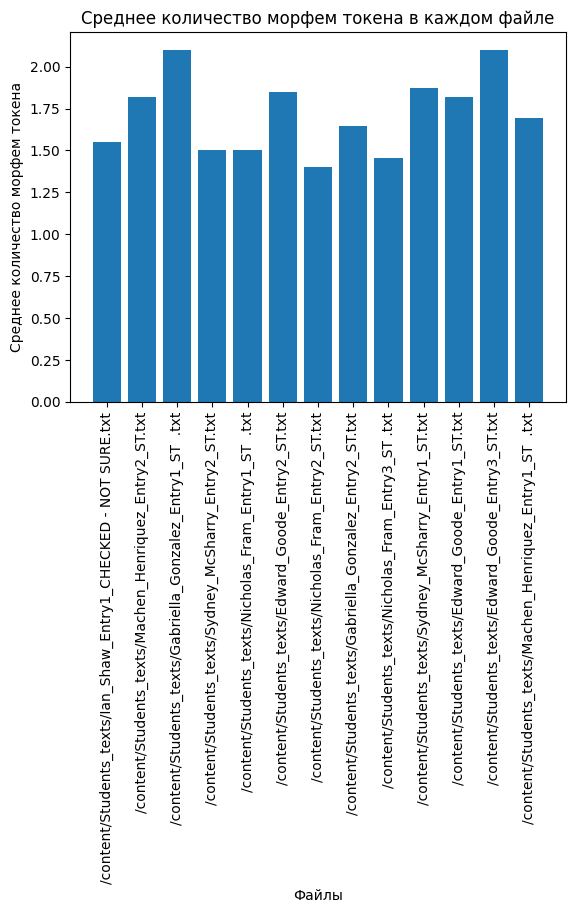

In [30]:
import os
import glob
import re
import matplotlib.pyplot as plt

# Путь к папке с файлами txt
folder_path = "/content/Students_texts"

# Путь к файлу словаря морфем
dictionary_file = "tihonov (2).txt"

# Считываем словарь морфем
morpheme_dictionary = {}
with open(dictionary_file, 'r', encoding='utf-8') as dict_file:
    for line in dict_file:
        line = line.strip()
        if line:
            word, morphemes = line.split('\t')
            morpheme_count = morphemes.count('/')
            morpheme_dictionary[word.lower()] = morpheme_count

# Получаем список всех файлов txt в папке
file_list = glob.glob(os.path.join(folder_path, "*.txt"))

# Список для хранения среднего количества морфем токена
avg_morpheme_counts = []

# Обрабатываем каждый файл
for file_path in file_list:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        tokens = re.findall(r'\b\w+\b', text)  # Разделение текста на токены

        total_morpheme_count = 0
        token_count = 0

        # Вычисляем количество морфем для каждого токена
        for token in tokens:
            # Приводим токен к нижнему регистру
            token = token.lower()

            # Проверяем наличие токена в словаре морфем
            if token in morpheme_dictionary:
                morpheme_count = morpheme_dictionary[token]
                total_morpheme_count += morpheme_count
                token_count += 1

        # Среднее количество морфем для файла
        avg_morpheme_count = total_morpheme_count / token_count if token_count > 0 else 0
        avg_morpheme_counts.append(avg_morpheme_count)

# Создание диаграммы
plt.bar(range(len(file_list)), avg_morpheme_counts, tick_label=file_list)
plt.xlabel('Файлы')
plt.ylabel('Среднее количество морфем токена')
plt.title('Среднее количество морфем токена в каждом файле')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()